# Merging

So far, our `DataFrame` is organized in a reasonable way. But, we know we can do better. We're eventually going to be interested in the unemployment rate for each country. The trouble is, we don't exactly know what the values in `country` refer to. We can fix that by getting country names. These can be found in `countries.csv`. Run the following cell to import the countries data using a URL as the file path.

In [17]:
import pandas as pd

unemployment = pd.read_csv("C:/Users/Simona/Desktop/Data Analysis/concordia-bootcamp/ds-intro-P3-modules-main/ds-intro-P3-modules-main/data/country_total.csv")
unemployment.head()



,country,seasonality,month,unemployment,unemployment_rate
0,at,nsa,1993.01,171000,4.5
1,at,nsa,1993.02,175000,4.6
2,at,nsa,1993.03,166000,4.4
3,at,nsa,1993.04,157000,4.1
4,at,nsa,1993.05,147000,3.9


If two set of data has the same index or a column that is same, we can merge

In [18]:
countries = pd.read_csv("C:/Users/Simona/Desktop/Data Analysis/concordia-bootcamp/ds-intro-P3-modules-main/ds-intro-P3-modules-main/data/countries.csv")
countries.sample(3)

,country,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
15,lv,LV,eu,Latvia,Lettonie,Lettland,56.880117,24.606555
14,it,IT,eu,Italy,Italie,Italien,42.504191,12.573787
8,fi,FI,eu,Finland,Finlande,Finnland,64.950159,26.067564


This file has lots of useful information. It even has the country names is three different languages.

Because the data we need is stored in two separate files, we'll want to merge the data somehow. Let's determine which column we can use to join this data. `country` looks like a good option. However, we don't need all of the columns in the `countries` `DataFrame`. To select certain columns, we use the name bracket notation we used to reorder the columns.

In [19]:
country_names = countries[['country', 'country_group', 'name_en']]

In [20]:
country_names.head(2)

,country,country_group,name_en
0,at,eu,Austria
1,be,eu,Belgium


`pandas` includes an easy-to-use merge function. Let's use it to **merge the two `DataFrame`s on country code.**

In [21]:
unemployment = pd.merge(unemployment, country_names, on='country')
unemployment

,country,seasonality,month,unemployment,unemployment_rate,country_group,name_en
0,at,nsa,1993.01,171000,4.5,eu,Austria
1,at,nsa,1993.02,175000,4.6,eu,Austria
2,at,nsa,1993.03,166000,4.4,eu,Austria
3,at,nsa,1993.04,157000,4.1,eu,Austria
4,at,nsa,1993.05,147000,3.9,eu,Austria
...,...,...,...,...,...,...,...
20791,uk,trend,2010.06,2429000,7.7,eu,United Kingdom
20792,uk,trend,2010.07,2422000,7.7,eu,United Kingdom
20793,uk,trend,2010.08,2429000,7.7,eu,United Kingdom
20794,uk,trend,2010.09,2447000,7.8,eu,United Kingdom


Merging is often more complex than this example. If you want to merge on multiple columns, you can pass a list of column names to the `on` parameter.

```
pd.merge(first, second, on=['name', 'id'])
```

For more information on merging, check the [documentation](http://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging).

`pandas` also provides a `.merge()` method that can act on a `DataFrame`. You can read more about that [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html).

Merging works like SQL `join` statements, with the `inner`, `outer` and other variants:

![](../data/pandas_merging_joins.jpg)

You may sometimes need to merge on columns with different names. To do so, use the `left_on` and `right_on` parameters, where the first listed `DataFrame` is the "left" one and the second is the "right." It might look something this.

```
pd.merge(one, two, left_on='city', right_on='city_name')
```

Suppose wanted to merge `unemployment` with a new DataFrame called `country_codes`, where the abbreviation for each country is in the column "c_code":

In [22]:
country_codes = country_names.rename({"country":"c_code"}, axis=1).drop("country_group", axis=1)
country_codes.head()

,c_code,name_en
0,at,Austria
1,be,Belgium
2,bg,Bulgaria
3,hr,Croatia
4,cy,Cyprus


In [23]:
country_codes = country_names.rename(columns={"country":"c_code"}).drop(columns="country_group")
country_codes.head()

,c_code,name_en
0,at,Austria
1,be,Belgium
2,bg,Bulgaria
3,hr,Croatia
4,cy,Cyprus


Use `merge` to merge `unemployment` and `country_codes` on their country codes. Make sure to specify `left_on=` and `right_on=` in the call to `merge`!

In [24]:
unemployment_merged = pd.merge(unemployment, country_codes, left_on='country', right_on='c_code')
unemployment_merged.head()

,country,seasonality,month,unemployment,unemployment_rate,country_group,name_en_x,c_code,name_en_y
0,at,nsa,1993.01,171000,4.5,eu,Austria,at,Austria
1,at,nsa,1993.02,175000,4.6,eu,Austria,at,Austria
2,at,nsa,1993.03,166000,4.4,eu,Austria,at,Austria
3,at,nsa,1993.04,157000,4.1,eu,Austria,at,Austria
4,at,nsa,1993.05,147000,3.9,eu,Austria,at,Austria


## 5. Calculating Unique and Missing Values

In [25]:
unemployment.head()

,country,seasonality,month,unemployment,unemployment_rate,country_group,name_en
0,at,nsa,1993.01,171000,4.5,eu,Austria
1,at,nsa,1993.02,175000,4.6,eu,Austria
2,at,nsa,1993.03,166000,4.4,eu,Austria
3,at,nsa,1993.04,157000,4.1,eu,Austria
4,at,nsa,1993.05,147000,3.9,eu,Austria


That's better. We now know that the abbreviation "at" corresponds to Austria. We might be curious to check what countries we have data for. The `Series` object includes a `.unique()` method. We'll use this to check the countries. We can select the name either using bracket or dot notation. (While we suggested using brackets above, it *is* sometimes easier to use dot notation. Just be careful.)

In [26]:
unemployment.name_en.unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Czech Republic',
       'Germany (including  former GDR from 1991)', 'Denmark', 'Estonia',
       'Spain', 'Finland', 'France', 'Greece', 'Croatia', 'Hungary',
       'Ireland', 'Italy', 'Lithuania', 'Luxembourg', 'Latvia', 'Malta',
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Sweden',
       'Slovenia', 'Slovakia', 'Turkey', 'United Kingdom'], dtype=object)

To get a count of the **number of unique countries,** we can either wrap the above code with `len()` to get the number of items in the array, or we can use the  `Series.nunique()` method.

In [27]:
unemployment.name_en.nunique()

30

It might be more interesting to know **how many observations** we actually have. `pandas` has a `Series` method called `.value_counts()` that returns the counts for the unique values in the `Series`.

In [28]:
unemployment['name_en'].value_counts()

France                                       1008
Sweden                                       1008
Portugal                                     1008
Netherlands                                  1008
Luxembourg                                   1008
Denmark                                      1008
Belgium                                      1008
Spain                                        1008
Ireland                                      1008
United Kingdom                               1002
Italy                                         924
Finland                                       828
Norway                                        786
Austria                                       648
Hungary                                       576
Slovakia                                      576
Slovenia                                      576
Bulgaria                                      576
Malta                                         576
Poland                                        576


By default, the `Series` is sorted by values. If you'd like it sorted by index&mdash;country name in this case&mdash;append the `.sort_index()` method.

In [29]:
unemployment['name_en'].value_counts().sort_index()

Austria                                       648
Belgium                                      1008
Bulgaria                                      576
Croatia                                       324
Cyprus                                        396
Czech Republic                                468
Denmark                                      1008
Estonia                                       387
Finland                                       828
France                                       1008
Germany (including  former GDR from 1991)     504
Greece                                        450
Hungary                                       576
Ireland                                      1008
Italy                                         924
Latvia                                        459
Lithuania                                     459
Luxembourg                                   1008
Malta                                         576
Netherlands                                  1008


This will be useful for our analysis. The maximum number of observations for a given country for this time period is 1,008 observations. We'll note that certain countries, such as Turkey, have far less data.

How about finding the **date range** for this data set? Let's look at the minimum and maximum years.

In [45]:
unemployment['year'].min(), unemployment['year'].max()

(1983, 2010)

Next, we should pause for a moment and think about what data we really care about. For our purposes, the variable of interest is `unemployment_rate`. The number of observations by country only reflect the number of instances of each country name in the dataset. It is possible, maybe even expected, to have some missing data within those instances. Let's find out **how many unemployment rate values are missing.**

In [31]:
unemployment['unemployment_rate'].isnull().sum()

945

The `.isnull()` method returns a corresponding boolean value for each entry in the unemployment rate `Series`. In Python `True` is equivalent to 1 and `False` is equivalent to 0. Thus, when we add the result (with `.sum()`), we get a count for the *total* number of missing values.

# Exploring unemployment rates

What are the minimum and maximum unemployment rates in our data set? Which unemployment rates are most and least common?

Hint: look at where we found the minimum and maximum years for a hint to the first question, and use `value_counts` for the second.

In [32]:
unemployment['unemployment_rate'].min(), unemployment['unemployment_rate'].max()

(1.1, 20.9)

In [47]:
unemployment['unemployment_rate'].value_counts()[:8]

7.2    305
7.1    290
7.4    285
7.3    271
7.8    255
4.2    252
8.4    249
5.0    247
4.5    243
8.3    241
6.9    240
7.0    239
4.6    237
4.8    234
7.9    231
4.4    228
8.0    228
Name: unemployment_rate, dtype: int64

In [34]:
unemployment['unemployment_rate'].describe()

count    19851.000000
mean         8.179764
std          3.922533
min          1.100000
25%          5.200000
50%          7.600000
75%         10.000000
max         20.900000
Name: unemployment_rate, dtype: float64

<AxesSubplot:>

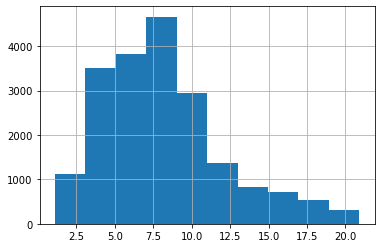

In [35]:
unemployment['unemployment_rate'].hist()

# Dealing With Missing Values: Boolean Indexing

Now that we know about the missing values, we have to deal with them. There are two main options:

* Fill the missing values with some other values.
* Do not use observations with missing values.
    * Depending on the analysis, we may want to exclude entire countries.
    
Because countries with missing unemployment rate data have at least 36 missing values, which is too many to fill, we'll take the second approach and **exclude missing values** from our primary analyses.

Instead of just getting rid of that data, it might make sense to store it in a separate `DataFrame`. This way, we could answer questions such as, "do missing values occur during certain months (or years) more frequently?" With this, we will introduce the concept of *boolean indexing* for filtering data.

In [48]:
unemployment_rate_missing = unemployment[unemployment['unemployment_rate'].isnull()]

Recall that `unemployment['unemployment_rate'].isnull()` produces an array of boolean values. We used this previously when counting the number of missing values, though we did not see its output. Let's see some of that now.

In [37]:
unemployment['unemployment_rate'].isnull()[:10]

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: unemployment_rate, dtype: bool

To create `unemployment_rate_missing`, we're indexing `unemployment` with the array above. This returns only the rows where the value in the array is `True`. Let's see if it worked.

In [38]:
unemployment_rate_missing.head()

,country,seasonality,month,unemployment,unemployment_rate,country_group,name_en
1656,bg,nsa,1995.01,391000,NaN,eu,Bulgaria
1657,bg,nsa,1995.02,387000,NaN,eu,Bulgaria
1658,bg,nsa,1995.03,378000,NaN,eu,Bulgaria
1659,bg,nsa,1995.04,365000,NaN,eu,Bulgaria
1660,bg,nsa,1995.05,346000,NaN,eu,Bulgaria


It is also possible to specify multiple conditions using the `&` operator, but each condition needs to be inside of parentheses. The `.isin()` method, which takes a `list` of values, is useful when you're interested in conditioning on multiple values on a given column. For example, if you want to select multiple countries.

Now, we're ready to remove the missing data in `unemployment`. To do this, we can use the `.dropna()` method.

In [39]:
unemployment.dropna(subset=['unemployment_rate'], inplace=True)

(Note that while we have dropped all observations for which `unemployment_rate == NaN`, this doesn't mean that all of our observations overlap exactly in time. We may find that there are dates where we have data for one country and no data for others.)

# Boolean Indexing
Suppose we only want to look at unemployment data from the year 2000 or later. Use Boolean indexing to create a DataFrame with only these years.

1. Select the "year" column from `unemployment`
2. Using the year data, create a **mask**: an array of Booleans where each value is True if and only if the year is 2000 or later. Remember, you can use Boolean operators like `>`, `<`, and `==` on a column
3. Use the mask from step 2 to index `unemployment`

In [40]:
# select the year column from unemployment
unemployment['year'] = unemployment['month'].astype(int)
year = unemployment['year']

# create a mask array
later_or_equal_2000 = year >= 2000
# What it looks like
later_or_equal_2000

0        False
1        False
2        False
3        False
4        False
         ...  
20791     True
20792     True
20793     True
20794     True
20795     True
Name: year, Length: 19851, dtype: bool

In [41]:
# Boolean index unemployment
unemployment_2000later = unemployment[later_or_equal_2000]
# Pulls from rows where mask is true
unemployment_2000later.head()

,country,seasonality,month,unemployment,unemployment_rate,country_group,name_en,year
84,at,nsa,2000.01,182000,4.7,eu,Austria,2000
85,at,nsa,2000.02,190000,4.9,eu,Austria,2000
86,at,nsa,2000.03,171000,4.5,eu,Austria,2000
87,at,nsa,2000.04,148000,3.9,eu,Austria,2000
88,at,nsa,2000.05,133000,3.5,eu,Austria,2000


# Sorting Values

At this point, you might be curious to know what the highest unemployment rates were. For this, we'll use the `DataFrame.sort_values()` method to **sort the data.**

In [42]:
unemployment.sort_values('unemployment_rate', ascending=False)[:5]

,country,seasonality,month,unemployment,unemployment_rate,country_group,name_en,year
15526,pl,nsa,2004.02,3531000,20.9,eu,Poland,2004
15525,pl,nsa,2004.01,3520000,20.7,eu,Poland,2004
15514,pl,nsa,2003.02,3460000,20.7,eu,Poland,2003
5663,es,sa,2010.09,4773000,20.6,eu,Spain,2010
15527,pl,nsa,2004.03,3475000,20.6,eu,Poland,2004


The above code creates a copy of the `DataFrame`, sorted in *descending* order, and prints the first five rows.

### Important: Index is shuffled

Notice the bolded index is now shuffled -- pandas keeps the default index as a normal behavior.

Often, we follow sorting by `.reset_index(drop=True)` if we want a new ordered index.

You may have noticed that the data set includes a `seasonality` column, which we haven't yet discussed. The unemployment rate in this data is actually calculated in three separate ways. Let's look at the values.

In [43]:
unemployment['seasonality'].unique()

array(['nsa', 'sa', 'trend'], dtype=object)

The three options above correspond to:

* not seasonally adjusted
* seasonally adjusted
* trend cycle

We'll stick with seasonally adjusted data so that the values are more comparable. Let's look at the highest unemployment rates in this context.

In [44]:
(unemployment[
    unemployment['seasonality'] == 'sa']
    .sort_values('unemployment_rate', ascending=False)[:5])

,country,seasonality,month,unemployment,unemployment_rate,country_group,name_en,year
5664,es,sa,2010.10,4758000,20.6,eu,Spain,2010
5663,es,sa,2010.09,4773000,20.6,eu,Spain,2010
5662,es,sa,2010.08,4739000,20.5,eu,Spain,2010
5665,es,sa,2010.11,4723000,20.4,eu,Spain,2010
15702,pl,sa,2002.10,3471000,20.3,eu,Poland,2002


Spain has the highest seasonally adjusted unemployment rate.

